## Project Objective:
Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which cause heart attacks so that certain precautions can be taken by individuals. In order to understand the reasons for heart attack, data was collected from various hospitals across the US, which is given in US_Heart_Patients.csv. In the dataset, there are Heart-Att indicators that indicate whether the person suffered from a heart attack or not.

**Perform EDA on the data and build a model which will predict whether the person will suffer from  Heart attack or not.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import os

import seaborn as sns


# Lets import and check the data

In [2]:
df_0 = pd.read_csv('US_Heart_Patients_2.csv')

In [3]:
df= df_0.copy()

In [4]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
print ("no. of rows: ",df.shape[0], "\n" "no. of columns : ",df.shape[1])

no. of rows:  4240 
no. of columns :  16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [7]:
for column in df.columns:
    print(column.upper(),':', df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

GENDER : 2

Gender
Female    2414
Male      1818
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    158
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    110
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0.0    2143
1.0    2094
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      120
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0     

**Converting a Catagorical Data in to 'Object'**

In [8]:
cat = ["education","currentSmoker","BP Meds","prevalentStroke","prevalentHyp","diabetes"]
for i in cat:
    df[i] = df[i].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


**divide data into 2 parts "Categorical Data" and "Numeric"**

In [10]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [11]:
round(df[num].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0
Heart-Att,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [12]:
round(df[cat].describe(),2).T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


**Find the duplication**

In [13]:
df.duplicated().sum()  # No duplicates found , its good sign

np.int64(0)

# Null Value analysis and treatment

In [14]:
round(df.isnull().sum() *100 / df.shape[0],2).sort_values()  # How much % null values are in data for each column

Heart-Att          0.00
age                0.05
prevalentHyp       0.05
diabetes           0.05
currentSmoker      0.07
Systolic BP        0.09
heartRate          0.09
Diastolic BP       0.12
Gender             0.19
prevalentStroke    0.21
BMI                0.57
cigsPerDay         0.73
BP Meds            1.42
tot cholesterol    1.42
education          2.59
glucose            9.22
dtype: float64

**null treatment on categorical column**

In [34]:
df.Gender = df.Gender.fillna("Female") # as it has only few values

In [35]:
df_mean = df.copy()
df_median = df.copy()
df_knn = df.copy()

In [36]:
for column in ['Gender','education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
    df_mean[column].fillna(df_mean[column].mode()[0],inplace = True)
    df_median[column].fillna(df_median[column].mode()[0],inplace = True)

C:\Users\hanzl\AppData\Local\Temp\ipykernel_6516\253097928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean[column].fillna(df_mean[column].mode()[0],inplace = True)
C:\Users\hanzl\AppData\Local\Temp\ipykernel_6516\253097928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [37]:
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

C:\Users\hanzl\AppData\Local\Temp\ipykernel_6516\3264591762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
C:\Users\hanzl\AppData\Local\Temp\ipykernel_6516\3264591762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [38]:
round(df_knn.isnull().sum()).sort_values()

Gender               0
Heart-Att            0
age                  2
prevalentHyp         2
diabetes             2
currentSmoker        3
Systolic BP          4
heartRate            4
Diastolic BP         5
prevalentStroke      9
BMI                 24
cigsPerDay          31
BP Meds             60
tot cholesterol     60
education          110
glucose            391
dtype: int64

**null treatment on numerical column**

In [39]:
for column in df_mean.columns:
    
    
    if df_mean[column].dtype != 'object':
    
    
        mean = df_mean[column].mean()
    
    
        df_mean[column] = df_mean[column].fillna(mean)

In [40]:
df_mean.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [41]:
for column in df_median.columns:
       
    if df_median[column].dtype != 'object':
       
        median = df_median[column].median()
        
        df_median[column] = df_median[column].fillna(median)

In [42]:
df_median.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [43]:
df_knn['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace = True)
df_knn

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [46]:
for i in ['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes','Heart-Att']:
    df_knn[i] = df_knn[i].astype("float")
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   float64
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB


In [47]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [50]:
df_mean

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.951936,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [51]:
df_mean['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace = True)
df_median['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace = True)

C:\Users\hanzl\AppData\Local\Temp\ipykernel_6516\3798485727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace = True)
C:\Users\hanzl\AppData\Local\Temp\ipykernel_6516\3798485727.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

# Univariate and Bivariate Analsis

**Mean Dataset**

In [53]:
df_mean['Heart-Att']

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: Heart-Att, Length: 4240, dtype: int64

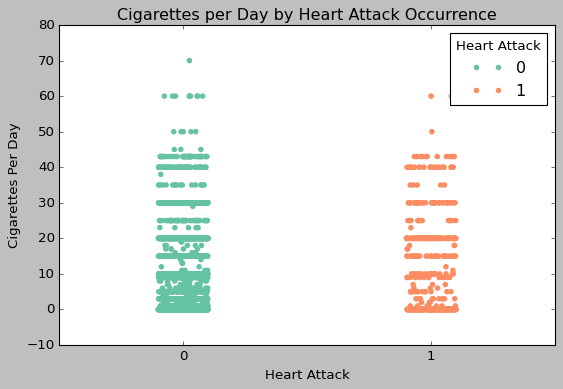

In [63]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x=df_mean['Heart-Att'], 
    y=df_mean['cigsPerDay'], 
    jitter=True, 
    hue=df_mean['Heart-Att'],  # Differentiate by Heart-Att categories
    palette="Set2"            # Use a color palette for distinction
)
plt.title("Cigarettes per Day by Heart Attack Occurrence")
plt.xlabel("Heart Attack")
plt.ylabel("Cigarettes Per Day")
plt.legend(title="Heart Attack", loc="upper right")  # Add legend for clarity
plt.show()


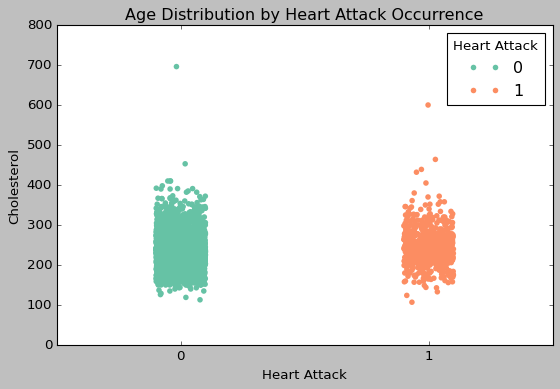

In [62]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x=df_mean['Heart-Att'], 
    y=df_mean['tot cholesterol'], 
    jitter=True, 
    hue=df_mean['Heart-Att'],  # Use hue to assign colors to different categories
    palette="Set2"            # Optional: Set a custom color palette
)
plt.title("Age Distribution by Heart Attack Occurrence")
plt.xlabel("Heart Attack")
plt.ylabel("Cholesterol")
plt.legend(title="Heart Attack", loc="upper right")  # Add a legend
plt.show()

In [66]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


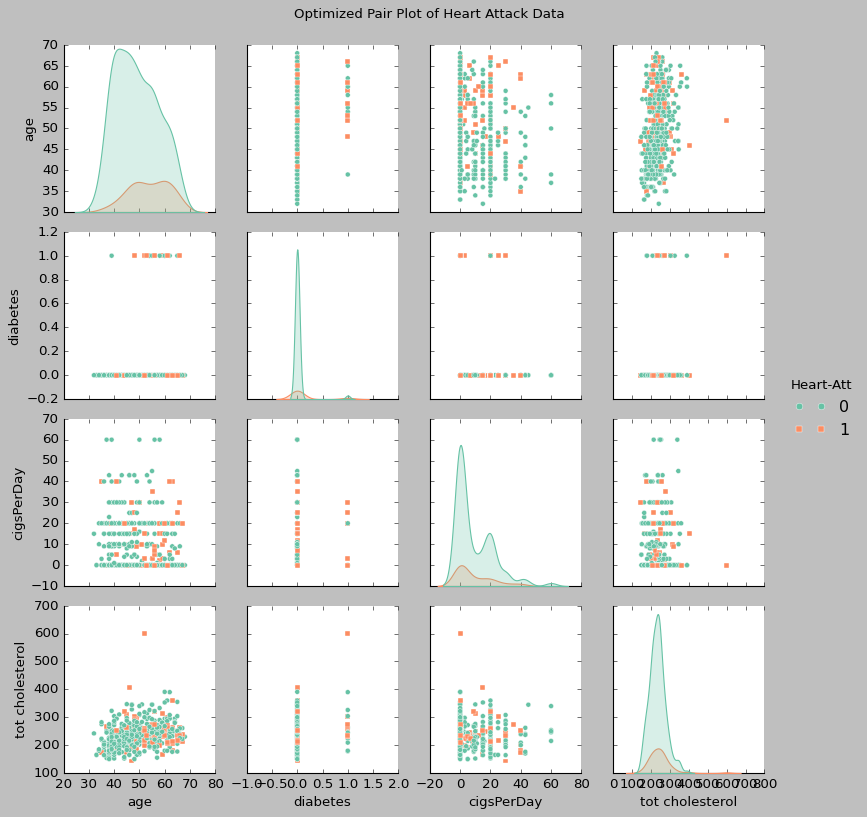

In [67]:
# Select a subset of relevant columns
columns_to_plot = ['age', 'diabetes','cigsPerDay', 'tot cholesterol', 'Heart-Att']
df_subset = df_mean[columns_to_plot]

# Pair plot with reduced features and hue
sns.pairplot(
    data=df_subset.sample(500),  # Randomly sample 500 rows
    hue="Heart-Att",            # Differentiate by 'Heart-Att' categories
    palette="Set2",             # Use a color palette
    diag_kind="kde",            # KDE on the diagonal
    markers=["o", "s"]          # Different markers for categories
)
plt.suptitle("Optimized Pair Plot of Heart Attack Data", y=1.02)  # Add a title
plt.show()

**Correlation Plot**

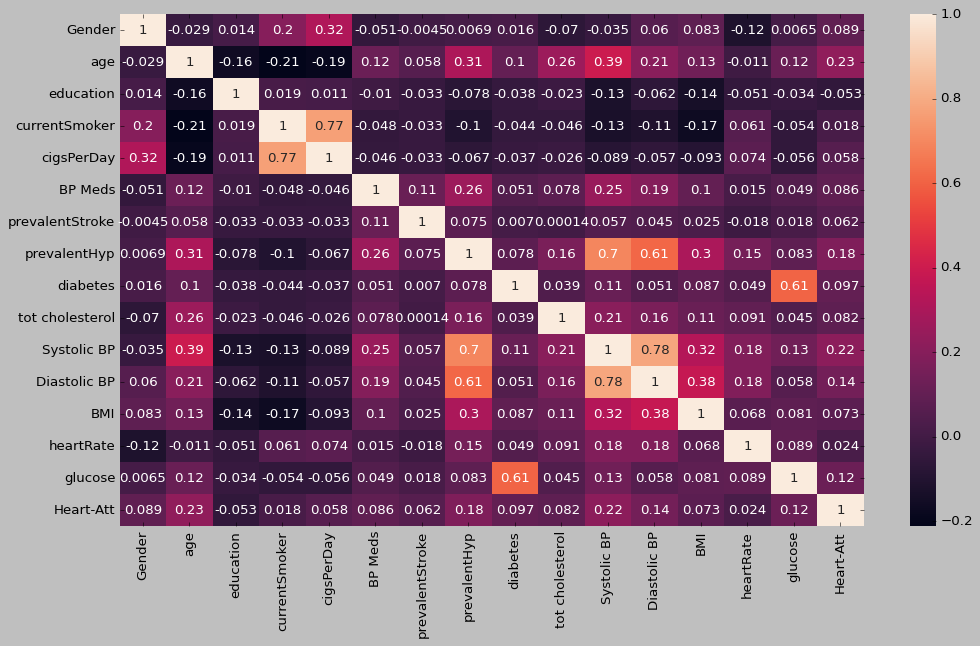

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(df_mean.corr(),annot=True)
plt.show()

In [72]:
df_mean.drop(['currentSmoker','Diastolic BP'],axis=1,inplace=True)

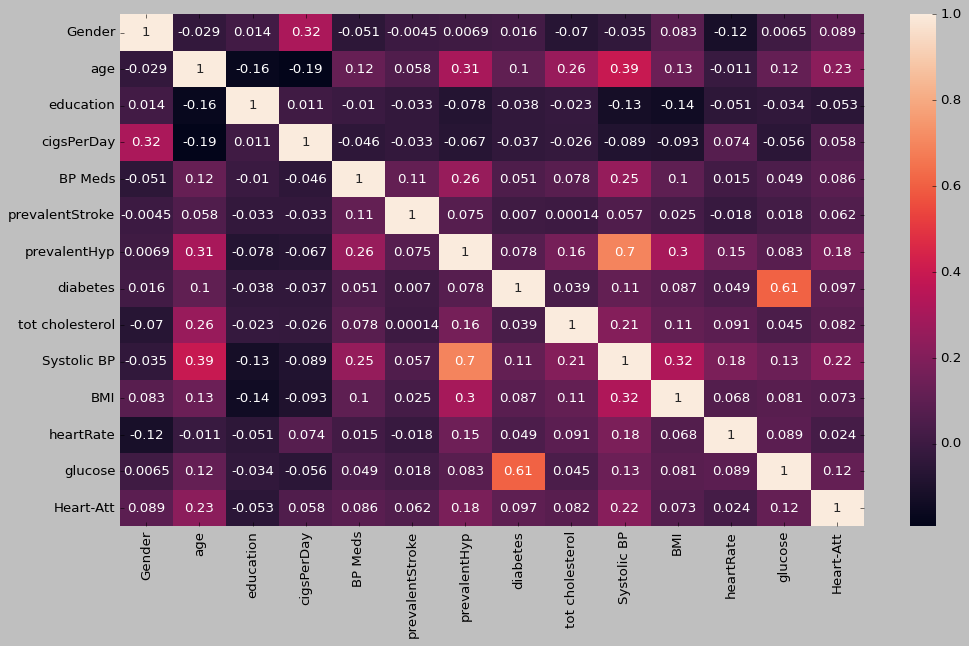

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(df_mean.corr(),annot=True)
plt.show()

# Outlier Treatment

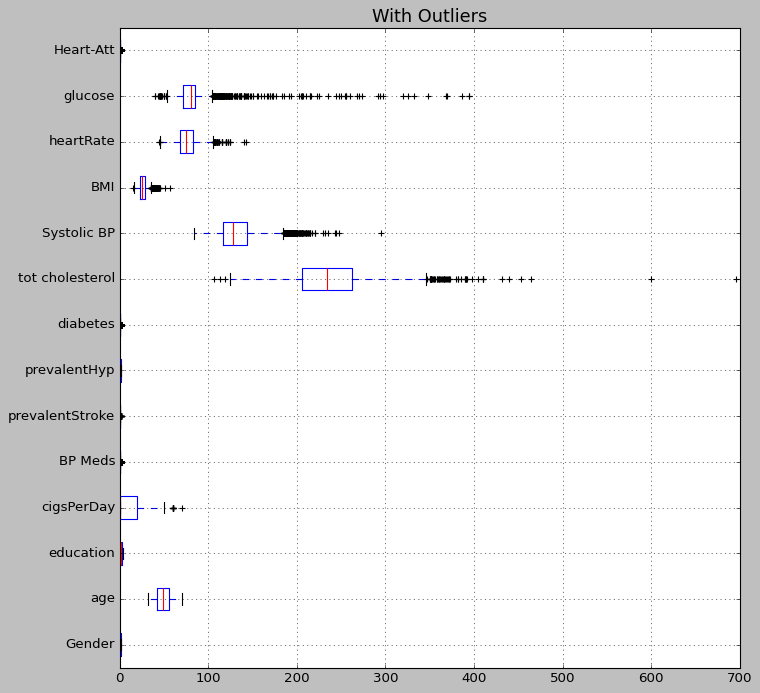

In [74]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [75]:
df_mean_o =df_mean.copy()

In [86]:
def remove_outlier(col):
    
    sorted(col)
    
    Q1,Q3=np.percentile(col,[25,75])
    
    IQR=Q3-Q1
    
    lower_range= Q1-(1.5 * IQR)
    
    upper_range= Q3+(1.5 * IQR)
    
    return lower_range, upper_range

In [87]:
for column in df_mean_o.drop('glucose',axis=1).columns:
    
    lr,ur=remove_outlier(df_mean_o[column])
        
        
    df_mean_o[column]=np.where(df_mean_o[column]>ur,ur,df_mean_o[column])
        
        
    df_mean_o[column]=np.where(df_mean_o[column]<lr,lr,df_mean_o[column])

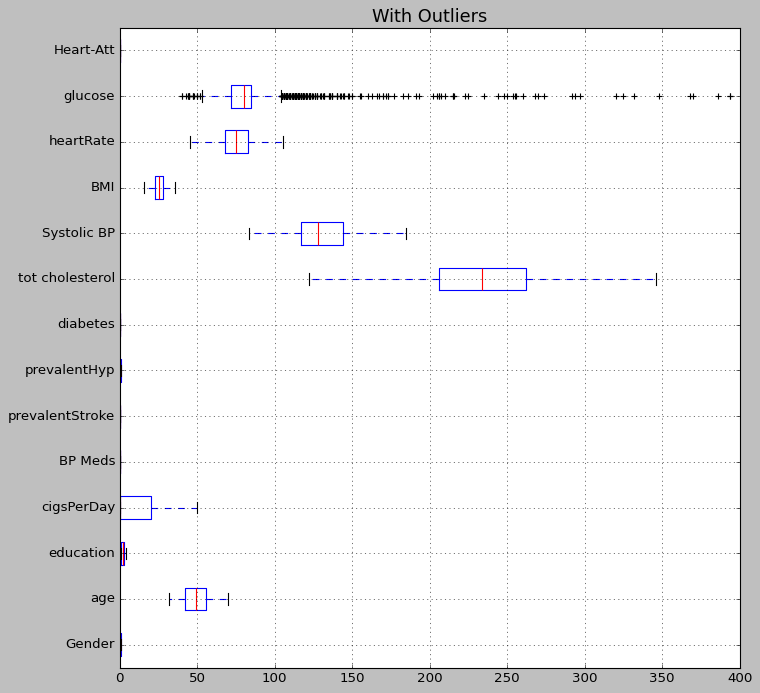

In [88]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean_o[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [90]:
df_mean_o

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.000000,0.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.951936,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,25.60,67.0,72.000000,0.0


# Scalling

**Min-Max Scaling**

In [94]:
df_mean_o  = df_mean_o.apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [97]:
df_mean  = df_mean.apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [98]:
df_mean

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,0.184211,1.000000,0.00,NaN,NaN,0.0,NaN,0.325893,0.222772,0.571862,0.575000,0.104520,NaN
1,0.0,0.368421,0.333333,0.00,NaN,NaN,0.0,NaN,0.571429,0.371287,0.660931,0.825000,0.101695,NaN
2,1.0,0.421053,0.000000,0.40,NaN,NaN,0.0,NaN,0.549107,0.435644,0.489372,0.491667,0.084746,NaN
3,0.0,0.763158,0.666667,0.60,NaN,NaN,1.0,NaN,0.459821,0.658416,0.653340,0.325000,0.177966,NaN
4,0.0,0.368421,0.666667,0.46,NaN,NaN,0.0,NaN,0.727679,0.460396,0.376012,0.658333,0.127119,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.40,NaN,NaN,0.0,NaN,0.562500,0.470297,0.320344,0.641667,0.129944,NaN
4236,0.0,0.315789,0.000000,0.30,NaN,NaN,0.0,NaN,0.392857,0.425743,0.176619,0.675000,0.118508,NaN
4237,0.0,0.526316,0.333333,0.00,NaN,NaN,0.0,NaN,0.656250,0.495050,0.293522,0.575000,0.189266,NaN
4238,1.0,0.210526,0.666667,0.00,NaN,NaN,1.0,NaN,0.281250,0.569307,0.502530,0.358333,0.090395,NaN


Scaling Methods & Model Building _ Data Analytics Project